In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
path = ''

#### 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [130]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{}yob{}.txt'.format(path, year), sep=',', names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names = ['Year', 'pos'])

In [131]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

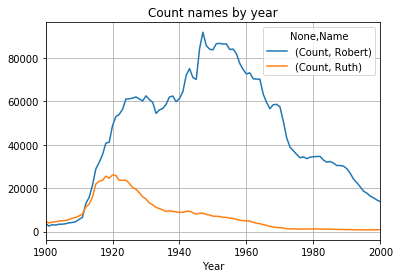

In [132]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(title = 'Count names by year', grid=True)

#### 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

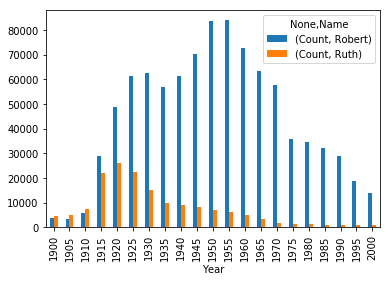

In [133]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')[::5].plot.bar()

#### 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [134]:
names_for_pie = names_by_year[1950][((names_by_year[1950].Name) >= 'R') & (names_by_year[1950].Name < 'S')].groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_for_pie

,Count
Name,
Robert,83778
Richard,51111
Ronald,29985
Roger,12578
Raymond,11218
Rebecca,9443
Ruth,7138
Roy,6491
Rita,6439


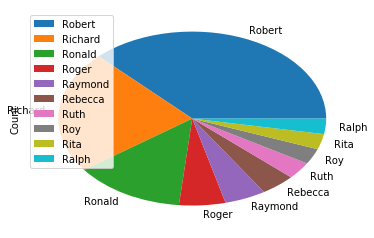

In [135]:
names_for_pie.plot.pie(y='Count')

#### 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [136]:
names = []
for year in range(1900, 2001):
    names.append(pd.read_csv('{}yob{}.txt'.format(path, year), sep=',', names = ['Name', 'Gender', 'Count']))
popular_names = pd.concat(names).groupby(by=['Name']).sum().reset_index()

In [137]:
popular_names['Len_consonants'] = popular_names.apply(lambda row: len(row.Name.lower().replace('a', '').replace('e', '').replace('i', '').replace('o', '').replace('u', '').replace('y', '')), axis=1)

In [138]:
popular_names.head()

,Name,Count,Len_consonants
0,Aadam,58,2
1,Aadarsh,5,4
2,Aadil,80,2
3,Aaditya,30,2
4,Aage,7,1


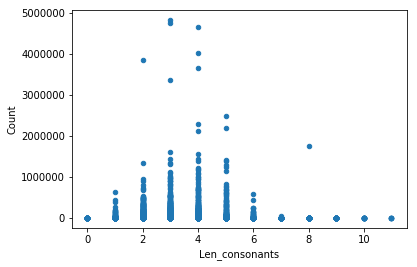

In [139]:
popular_names.plot.scatter(x='Len_consonants', y='Count')